Module 5— Session 3 Gradient Descent and Backpropagation

To solidify the mathematical concepts of gradient descent and backpropagation, 
and to implement a basic neural network training loop.

Exercise 1- The Gradient Descent Step

W = 3.0  
Learning rate η = 0.01  
dL/dW = -5.0

1. Slope

The slope is the gradient:
dL/dW = -5.0

Since it is negative, the function is sloping downward.
This means we are moving downhill as W increases.

2. Should we increase or decrease W?
Gradient descent moves in the opposite direction of the gradient.

Since the gradient is negative, we must increase W 
(to move in the positive direction).

3. Update the weight

Gradient Descent formula:
W_new = W - η * (dL/dW)
W_new = 3.0 - 0.01 * (-5.0)
W_new = 3.0 + 0.05
W_new = 3.05

Exercise 2- The Chain Rule
x = 2  
w₁ = 3  
w₂ = 4  
y = 30  


Network:
a = w₁ * x  
ŷ = w₂ * a  

Loss:
L = (ŷ - y)²

1. Forward Pass

a = w₁ * x  
a = 3 * 2  
a = 6  

ŷ = w₂ * a  
ŷ = 4 * 6  
ŷ = 24

2. Calculate Loss

L = (ŷ - y)²  

L = (24 - 30)²  
L = (-6)²  
L = 36

3. Backward Pass (Chain Rule)

Chain rule:
dL/dw₁ = (dL/dŷ) * (dŷ/da) * (da/dw₁)

Step 1: dL/dŷ
L = (ŷ - y)²  

Derivative:
dL/dŷ = 2(ŷ - y)

dL/dŷ = 2(24 - 30)  
dL/dŷ = 2(-6)  
dL/dŷ = -12


Step 2: dŷ/da
ŷ = w₂ * a  

Derivative:
dŷ/da = w₂ = 4


Step 3: da/dw₁
a = w₁ * x  

Derivative:
da/dw₁ = x = 2

Final Gradient

dL/dw₁ = (-12) * 4 * 2  
dL/dw₁ = -96

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42
)

In [6]:
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


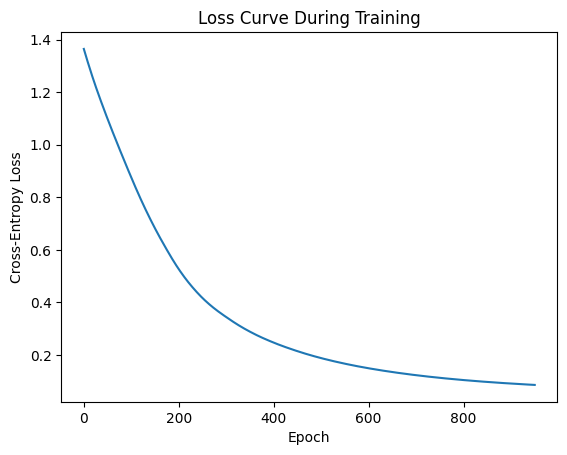

In [7]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve During Training")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.show()

In [8]:
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Final Test Accuracy:", accuracy)

Final Test Accuracy: 1.0
